In [65]:
import numpy as np
import pandas as pd

# Alaskan Snow Crab Eastern Bering Sea Geospatial Data Analysis

Folium maps use Javascript so they're not visible in Github notebooks for security reasons. 

For this reason I've added screenshots of the generated maps

In [66]:
df = pd.read_csv("/kaggle/input/snowcrab/mfsnowcrab.csv")

Tabular data includes:

* Latitude: The latitude (decimal degrees) at the start of the haul.
* Longitude: The longitude (decimal degrees) at the start of the haul.
* Year: Year specimen was collected.
* Name: The common name of the marine organism associated with the scientific name.
* Sex: Gender of crab.
* Bottom Depth: Meters (m). Weighted average depth (m) and is calculated by adding gear depth to net height.
* Surface Temperature: Surface temperature, in tenths of a degree, Celsius.
* Bottom Temperature: Average temperature (in tenths of a degree Celsius) measured at the maximum depth of the trawl.
* Haul: This number uniquely identifies a haul within a cruise. It is a sequential number, in chronological order of occurrence.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17927 non-null  int64  
 1   latitude             17927 non-null  float64
 2   longitude            17927 non-null  float64
 3   year                 17927 non-null  int64  
 4   name                 17927 non-null  object 
 5   sex                  17927 non-null  object 
 6   bottom_depth         17927 non-null  int64  
 7   surface_temperature  17927 non-null  float64
 8   bottom_temperature   17927 non-null  float64
 9   haul                 17927 non-null  int64  
 10  cpue                 17927 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


In [68]:
df.head(50).style.background_gradient(axis=0)

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,147038,57.000000,-166.450000,1975,snow crab,male,71,9.100000,1.100000,117,40356
1,147037,57.000000,-167.083330,1975,snow crab,male,71,8.700000,1.400000,118,68691
2,147036,57.000000,-167.683330,1975,snow crab,male,75,8.800000,1.600000,139,119748
3,147035,56.666670,-172.566670,1975,snow crab,male,132,6.100000,2.500000,89,7882
4,147034,56.666670,-171.966670,1975,snow crab,male,123,5.700000,2.100000,90,11258
5,147033,56.666670,-171.333330,1975,snow crab,male,119,5.700000,2.500000,91,6492
6,147032,56.666670,-170.733330,1975,snow crab,male,110,6.000000,2.400000,94,6341
7,147004,56.350000,-165.233330,1975,snow crab,male,84,7.200000,0.500000,107,11228
8,147027,56.683330,-161.000000,1975,snow crab,male,66,2.000000,0.800000,16,207
9,147026,56.666670,-161.650000,1975,snow crab,male,90,1.800000,1.300000,11,829


In [69]:
# 184 data points in 1975
df_temp = df[df.year==1975]
len(df_temp.index)

184

### How did the Catch Per Unit Effort (CPUE) change over time?

<Axes: xlabel='year'>

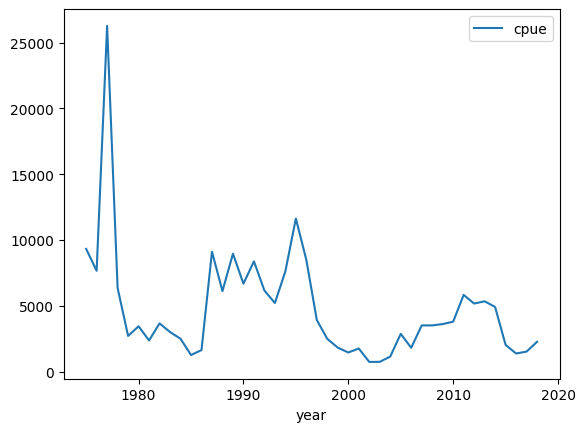

In [70]:
df[["year","cpue"]].groupby("year").median().plot()

### The catch per unit effort appears to be very low but recovering as of 2018

In [71]:
df[["year","cpue"]].groupby("year").median()[:10]

,cpue
year,
1975,9323.0
1976,7659.0
1977,26262.0
1978,6358.0
1979,2711.5
1980,3445.0
1981,2364.0
1982,3665.5
1983,3004.5


### There is a large spike in CPUE in 1977. This is despite there being 106 data points, which isn't very low and somewhat rules out this being due to noise:

In [72]:
df[["year","cpue"]].groupby("year").count()[:10]

,cpue
year,
1975,184
1976,194
1977,106
1978,316
1979,336
1980,361
1981,415
1982,472
1983,432


### Can we see changes in water temperature over time in this dataset?

<Axes: xlabel='year'>

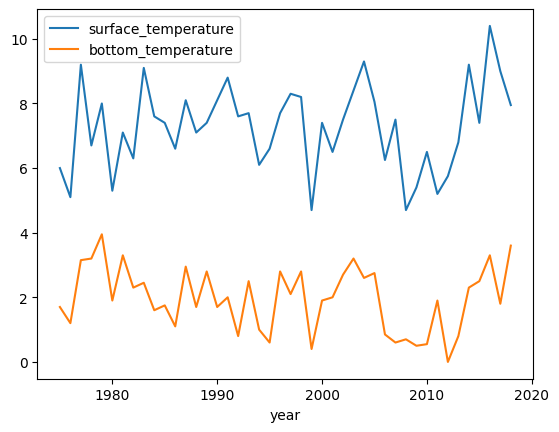

In [73]:
df[["year","surface_temperature","bottom_temperature"]].groupby("year").median().plot()

No obvious trend in the values of water temperature over time.

Obviously surface temperature is higher than bottom, but it's nice to see correlation in the averages for both of these every year.

### Are more female or male crabs being caught? Does this change over time?

In [74]:
df[["year","sex"]].groupby(["year","sex"]).size()

year  sex   
1975  female     76
      male      108
1976  female     90
      male      104
1977  female     43
               ... 
2016  male      230
2017  female    158
      male      221
2018  female    171
      male      219
Length: 88, dtype: int64

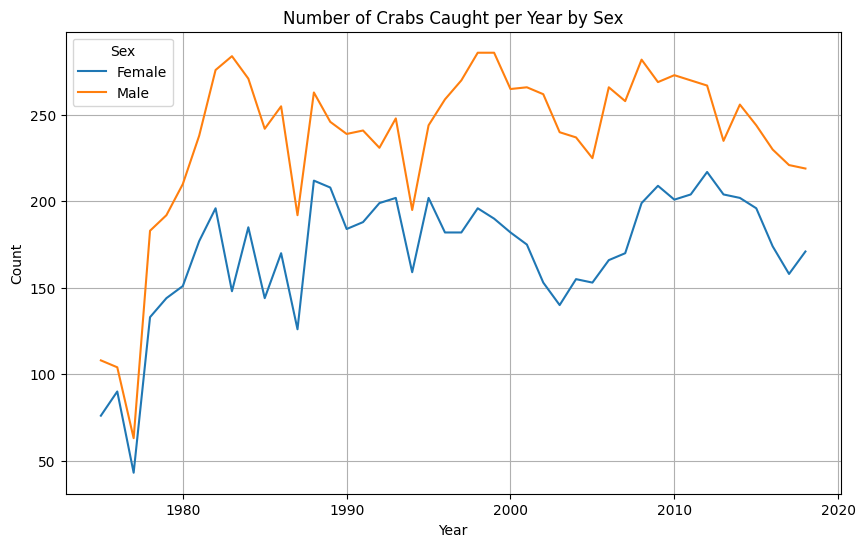

In [75]:
import matplotlib.pyplot as plt

# Group by year and sex, and count the number of entries
counts = df.groupby(["year", "sex"]).size().unstack(fill_value=0)

# Plot the counts for males and females over the years
counts.plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title('Number of Crabs Caught per Year by Sex')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid()
plt.show()


Consistently over the years, most crabs caught are male.

### Where are snow crabs most commonly caught?

In [76]:
male_crabs_df = df[df.sex=="male"][["latitude","longitude"]]
female_crabs_df = df[df.sex=="female"][["latitude","longitude"]]
crab_haul_locations = df[["latitude","longitude"]]

In [77]:
import folium
from folium.plugins import HeatMap
crab_map = folium.Map(location=[55.3,-166.9], zoom_start=5)
lat_longs = crab_haul_locations.values

HeatMap(lat_longs,min_opacity=0.05, 
                max_opacity=0.9, 
                radius=15).add_to(crab_map)
crab_map

### It appears that there are three places where the crabs in the dataset were most commonly caught:
* North of Sain Paul Island
* North of Saint George Island
* South of the Bering Sea Wilderness





# Seeing how the haul locations changed over time

In [78]:
df.year = pd.to_datetime(df["year"], format="%Y")

In [79]:
from collections import defaultdict, OrderedDict

data = defaultdict(list)
for r in df.itertuples():
    data[r.year.year].append([r.latitude, r.longitude])
    
data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

In [80]:
crab_map = folium.Map(location=[55.3,-166.9], zoom_start=5)

hm = folium.plugins.HeatMapWithTime(data=list(data.values()), index=list(data.keys()), auto_play=False, max_opacity=0.9, min_opacity=0.05, radius=20)
hm.add_to(crab_map)
crab_map

From the time-indexed heatmap we can see that in the first few years (until ~1980) there were no strong concentrations of hauls, 

Then much more crabs started to be caught near Saint Paul & Saint George islands. Moreover, more hauls are reported further north.

In 1983 a higher number of hauls started to be recorded south of the Bering Sea Wilderness.